In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.models import load_model
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('/Users/harshsamant/Downloads/diabetes.csv')
# data = pd.read_csv('/Iris.csv')
print(data.shape)
print(data.columns)
data.info()

(768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
            'BMI', 'DiabetesPedigreeFunction', 'Age']
label = ['Outcome']
X = data[features]
y = data[label]

In [5]:
def generate_latent_points(latent_dim, n_samples):
	x_input = np.random.randn(latent_dim * n_samples)
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

In [6]:
def generate_fake_samples(generator, latent_dim, n_samples):
	x_input = generate_latent_points(latent_dim, n_samples)
	X = generator.predict(x_input)
	y = np.zeros((n_samples, 1))
	return X, y

In [7]:
def generate_real_samples(n):
  X = data.sample(n)

  #generate class labels
  y = np.ones((n, 1))
  return X, y

In [8]:
def define_generator(latent_dim, n_outputs=9):
    model = Sequential()
    model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(n_outputs, activation='linear'))
    return model

gen = define_generator(10)
gen.summary()

/opt/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-07 22:39:09.985061: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-05-07 22:39:09.985080: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-05-07 22:39:09.985085: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-05-07 22:39:09.985099: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-07 22:39:09.985111: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │           279 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 924 (3.61 KB)

 Trainable params: 924 (3.61 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
def define_discriminator(n_inputs=9):
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

discriminator1 = define_discriminator()
discriminator1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 25)             │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,601 (6.25 KB)

 Trainable params: 1,601 (6.25 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
def define_gan(generator, discriminator):
	discriminator.trainable = False
	model = Sequential()
	model.add(generator)
	model.add(discriminator)
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

In [11]:
def plot_history(d_hist, g_hist):
	plt.subplot(1, 1, 1)
	plt.plot(d_hist, label='d')
	plt.plot(g_hist, label='gen')
	# plt.legend()
	# plot discriminator accuracy
	# pyplot.subplot(2, 1, 2)
	# pyplot.plot(a1_hist, label='acc-real')
	# pyplot.plot(a2_hist, label='acc-fake')
	plt.show()

In [12]:
def train(g_model, d_model, gan_model, latent_dim, n_epochs=250, n_batch=128):
    half_batch = int(n_batch / 2)

    d_history = []
    g_history = []

    for epoch in range(n_epochs):
        x_real, y_real = generate_real_samples(half_batch)
        x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        d_loss_real, d_real_acc = d_model.train_on_batch(x_real, y_real)
        d_loss_fake, d_fake_acc = d_model.train_on_batch(x_fake, y_fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # prepare points in latent space as input for the generator
        x_gan = generate_latent_points(latent_dim, n_batch)

        # create inverted labels for the fake samples
        y_gan = np.ones((n_batch, 1))

        # update the generator via the discriminator's error
        g_loss_fake = gan_model.train_on_batch(x_gan, y_gan)

        print(f'>Epoch {epoch+1}, Real_Loss_Disc: {d_loss_real:.4f} Fake_Loss_Disc=: {d_loss_fake:.3f} Disc_Loss: {d_loss:.3f} Gen_Loss: {g_loss_fake:.3f}')
        d_history.append(d_loss)
        g_history.append(g_loss_fake)
    plot_history(d_history, g_history)
    g_model.save('Generator.h5')

In [13]:
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
	x_real, y_real = generate_real_samples(n)
	_, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
	_, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
	print(epoch, acc_real, acc_fake)
	plt.scatter(x_real[:, 0], color='red')
	plt.scatter(x_fake[:, 0], color='blue')
	plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


2024-05-07 22:39:10.223759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/opt/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py:74: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


>Epoch 1, Real_Loss_Disc: 6.2057 Fake_Loss_Disc=: 3.497 Disc_Loss: 4.851 Gen_Loss: 0.712
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
>Epoch 2, Real_Loss_Disc: 3.8462 Fake_Loss_Disc=: 3.093 Disc_Loss: 3.469 Gen_Loss: 0.712
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
>Epoch 3, Real_Loss_Disc: 3.8298 Fake_Loss_Disc=: 3.314 Disc_Loss: 3.572 Gen_Loss: 0.691
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
>Epoch 4, Real_Loss_Disc: 3.4289 Fake_Loss_Disc=: 3.101 Disc_Loss: 3.265 Gen_Loss: 0.678
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
>Epoch 5, Real_Loss_Disc: 3.4362 Fake_Loss_Disc=: 3.178 Disc_Loss: 3.307 Gen_Loss: 0.667
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
>Epoch 6, Real_Loss_Disc: 3.3820 Fake_Loss_Disc=: 3.181 Disc_Loss: 3.281 Gen_Loss: 0.652
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
>Epoch 7, Real_Loss_Disc: 3.3837 Fake_Loss_Disc=: 3.211 Disc_Loss: 3.297 Gen_Loss: 0.639
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
>Epoch 8, Real_Loss_Disc: 3.4178 Fake_Loss_Disc=: 3.262 Disc_Loss: 3.340 Gen_Loss: 0.624
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2

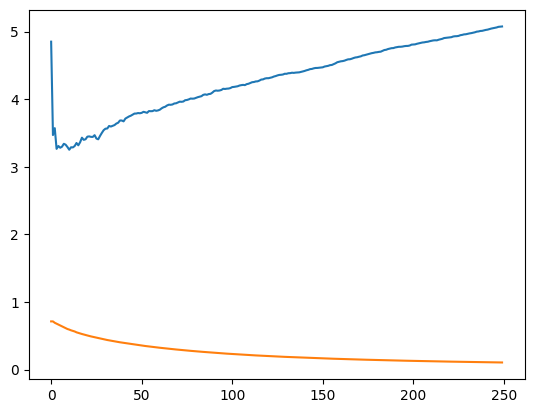

In [14]:
latent_dim = 10
discriminator = define_discriminator()
generator = define_generator(latent_dim)
gan_model = define_gan(generator, discriminator)
train(generator, discriminator, gan_model, latent_dim)

In [16]:
model = load_model('Generator.h5')
latent_points = generate_latent_points(10, 750)
X = model.predict(latent_points)
data_fake = pd.DataFrame(data=X,  columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                            'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])
data_fake.head(20)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-1.889523,3.624552,1.618774,1.300754,3.345721,-0.927804,4.039406,-3.418354,-2.222330
1,-1.522061,3.567859,3.446243,2.440364,6.205279,0.525804,7.053171,-4.417117,-3.016030
2,-1.363348,2.162410,1.845306,1.223743,2.364271,-0.332172,3.055547,-2.167832,-1.546743
3,-1.396837,4.815635,3.004989,2.636297,5.054331,-0.093423,6.434397,-4.355885,-3.320166
4,-1.659602,2.966170,3.178018,1.500959,4.368052,-0.060302,5.199034,-3.041380,-1.979140
5,-1.374625,3.145884,2.664761,2.805292,4.661870,0.248463,5.587871,-3.697398,-3.299416
6,-3.996501,9.509398,4.567500,3.247872,7.986123,-1.692735,9.833943,-7.165871,-5.365058
7,-2.514470,6.321843,3.641929,2.469301,5.305247,-0.892662,6.735856,-6.415323,-4.223166
8,-2.436575,6.964614,3.502327,2.656956,6.203565,-1.543326,7.751662,-6.135615,-4.036727
9,-1.663859,3.262992,2.018409,2.458658,3.253175,-0.836494,4.508234,-3.415699,-2.791279


: 